### SGDRegressor

+ A biblioteca Scikit-Learn disponibiliza a classe `SGDRegressor` para realizar regressão linear utilizando o Gradiente Descendente Estocástico.
+ A classe possui vários parâmetros que podem ser configurados (e.g., tipo de função de erro, esquema de variação do passo de aprendizagem, etc.).
+ Após instanciarmos um objeto dessa classe, o treinamento é feito com o método `fit` e a predição é feita com o método `predict`.
+ Além da versão estocástica, podemos implementar a versão em mini-batches com a classe `SGDRegressor` usando o método `partial_fit`.
+ Os pesos são acessados através dos atributos `intercept_` e `coef_` do objeto da classe `SGDRegressor`.
+ Porém, não conseguimos implementar a versão em batelada.
+ Para mais informações sobre a classe `SGDRegressor`, acesse sua documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

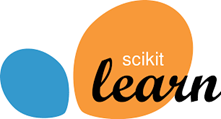

In [2]:
import numpy as np
import random
# Usamos a classe SGDRegressor do módulo Linear da biblioteca sklearn.
from sklearn.linear_model import SGDRegressor

In [2]:
# Reseta gerador de sequências pseudo-aleatórias.
random.seed(42)

In [3]:
# Número de exemplos
N = 1000

# Atributos.
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)

# Ruído.
w = np.random.randn(N, 1)

# Modelo gerador.
y = 2*x1 + 4*x2

# Função observável.
y_noisy = y + w

In [4]:
# Concatena os vetores coluna x1 e x2.
X = np.c_[x1, x2]

# Instancia a classe SGDRegressor.
# 'fit_intercept=False': como modelo gerador não tem peso a0 (intercept), não precisamos encontrá-lo.
sgd_reg = SGDRegressor(max_iter=100, fit_intercept=False, shuffle=False)

# Treina o modelo.
sgd_reg.fit(X, y.ravel())

# Faz previsão com o modelo treinado.
y_pred = sgd_reg.predict(X)

# Imprime o número de iterações até que o algoritmo pare de treinar.
print('Number of iterations:', sgd_reg.n_iter_)

Number of iterations: 9


In [5]:
Jgde = (1.0/N)*np.sum(np.square(y_noisy - y_pred.reshape(N,1)))
print('Jgde:', Jgde)

Jgde: 1.0493590079907171


In [6]:
# Imprime valores encontrados pelo GDE.
print('a1: %1.4f' % (sgd_reg.coef_[0]))
print('a2: %1.4f' % (sgd_reg.coef_[1]))

a1: 1.9998
a2: 3.9996
